# Speech Emotion Recognition

Speech is the most natural way of expressing ourselves as humans. It is only natural 
then to extend this communication medium to computer applications. We define 
speech emotion recognition (SER) systems as a collection of methodologies that 
process and classify speech signals to detect the embedded emotions

In [106]:
import numpy as np
import pandas as pd

#To split the data
from sklearn.model_selection import train_test_split

#for the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#useful for plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
import librosa.display

#Useful for training and data normalization
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import utils

#For reading the audio paths
import os
from pathlib import Path
import librosa

#To listen to the audio
import IPython

#To prevent showing the warnings
import warnings
warnings.filterwarnings('ignore')

#For training the data.
import torch
from torch import nn
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Reading and understanding the data.

### We will use the Crema dataset which is speech emotion:

#### The classes we have: 

SAD - sadness

ANG - angry

DIS  - disgust

FEA  - fear

HAP  - happy

NEU  - neutral

In [2]:
#the crema path
crema_path = "/content/gdrive/MyDrive/speech/Crema/"

In [3]:
#Empty list to append each audio with it's corresponding class.
crema=[]
#looping through the file
for wav in os.listdir(crema_path):
    #splitting each line by -
    audio = wav.partition(".wav")[0].split('_')
    if audio[2]=='SAD': #if it's a sad audio
        crema.append(('sad',crema_path+'/'+wav))
    elif audio[2]=='ANG': #if it is an angry audio
        crema.append(('angry',crema_path+'/'+wav))
    elif audio[2]=='DIS': #if it is a disgust audio
        crema.append(('disgust',crema_path+'/'+wav))
    elif audio[2]=='FEA': #if it is a fear audio
        crema.append(('fear',crema_path+'/'+wav))
    elif audio[2]=='HAP': # if it is a happy audio
        crema.append(('happy',crema_path+'/'+wav))
    elif audio[2]=='NEU': # if it is a neautral audio.
        crema.append(('neutral',crema_path+'/'+wav))
#covert to a dataframe with 2 coloumns
df=pd.DataFrame.from_dict(crema)
df.rename(columns={0:'Emotion',1:'audio_Path'},inplace=True)

In [4]:
#printing the data frame
df

,Emotion,audio_Path
0,angry,/content/gdrive/MyDrive/speech/Crema//1081_IWL...
1,disgust,/content/gdrive/MyDrive/speech/Crema//1081_TIE...
2,happy,/content/gdrive/MyDrive/speech/Crema//1079_TAI...
3,disgust,/content/gdrive/MyDrive/speech/Crema//1081_IWW...
4,disgust,/content/gdrive/MyDrive/speech/Crema//1079_TIE...
...,...,...
7437,angry,/content/gdrive/MyDrive/speech/Crema//1008_IOM...
7438,sad,/content/gdrive/MyDrive/speech/Crema//1006_MTI...
7439,disgust,/content/gdrive/MyDrive/speech/Crema//1007_IEO...
7440,angry,/content/gdrive/MyDrive/speech/Crema//1008_TAI...


In [5]:
#the unique values in the data frame
df['Emotion'].unique()

array(['angry', 'disgust', 'happy', 'neutral', 'sad', 'fear'],
      dtype=object)

### visualizing the data

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

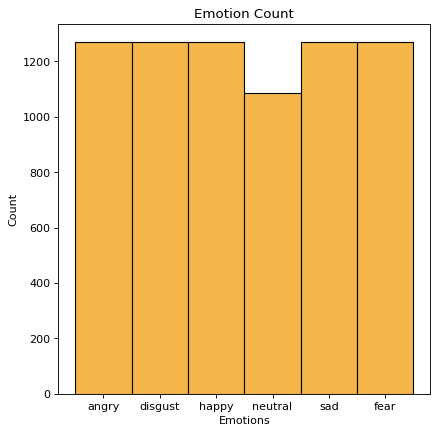

In [6]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count")
plt.xlabel('Emotions')
plt.ylabel('Count')
sns.histplot(df.Emotion, color='#F19C0E')

### Plotting the waveform for each class

In [7]:
#To plot the waveform.
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(f'{emotion} emotion waveplot', size=10)
    librosa.display.waveshow(y=data,sr=sr)

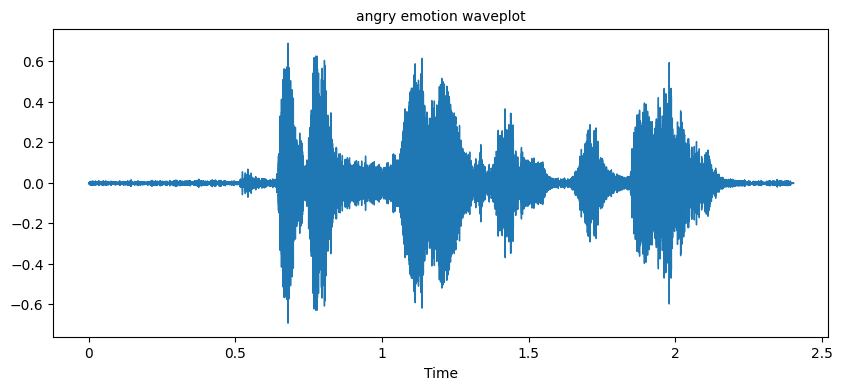

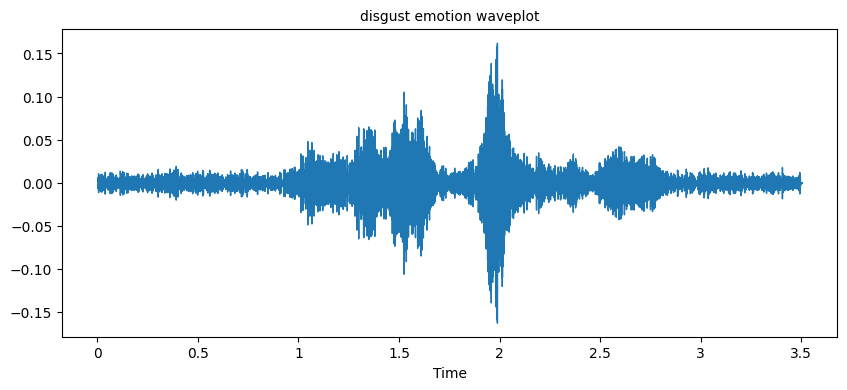

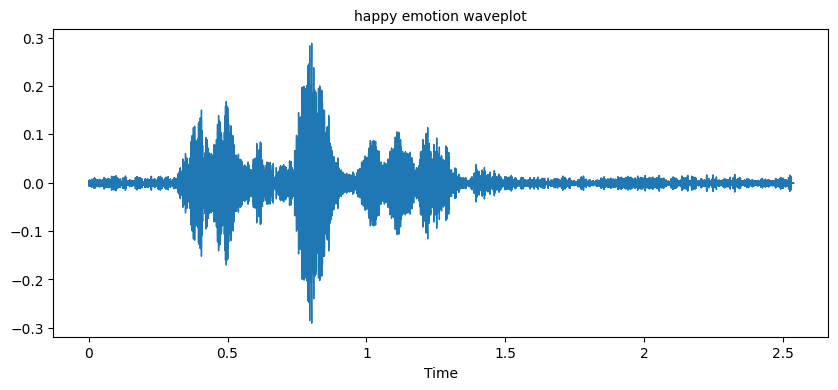

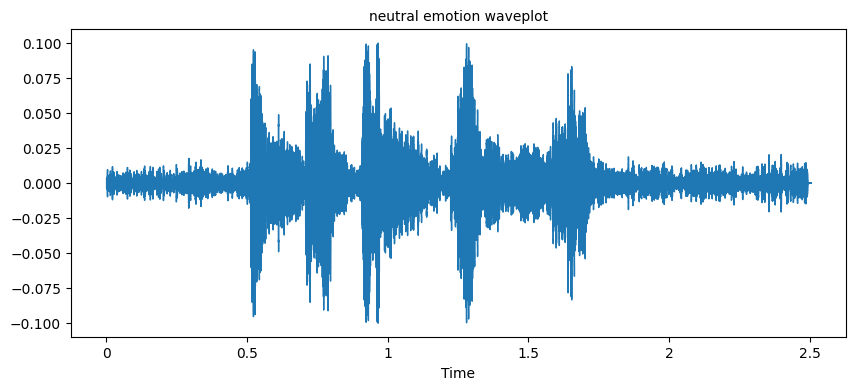

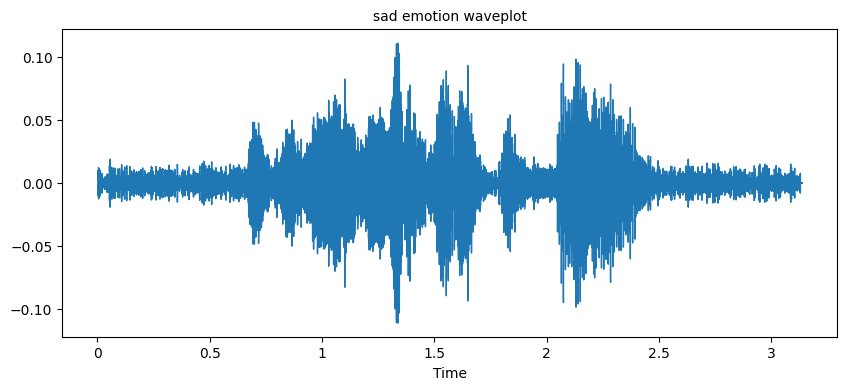

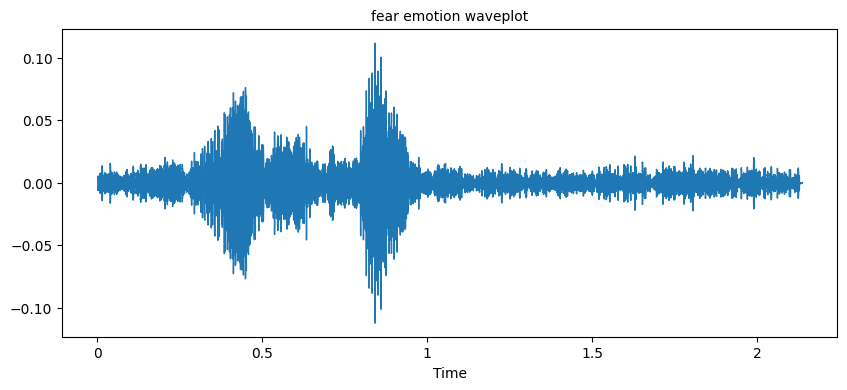

In [8]:
audio_path=[]
for emotion in df['Emotion'].unique():
    #Getting the path of each audio.
    path=np.array(df['audio_Path'][df['Emotion']==emotion])[1]
    #getting the samples and sr of the audios
    data, sr=librosa.load(path) # the data is the a vector of the audio represntation.
    #Plotting the waveform of each class.
    wave_plot(data, sr,emotion)
    audio_path.append(path)

### Listening to each emotion

In [9]:
#The angry emotion.
print('Angry emotion Audio\n')
IPython.display.Audio(audio_path[0])

Angry emotion Audio



In [10]:
#The disgust disgust.
print('disgust emotion Audio\n')
IPython.display.Audio(audio_path[1])

disgust emotion Audio



In [11]:
#The fear emotion.
print('Fear emotion Audio\n')
IPython.display.Audio(audio_path[2])

Fear emotion Audio



In [12]:
#The happy emotion.
print('Happy emotion Audio\n')
IPython.display.Audio(audio_path[3])

Happy emotion Audio



In [13]:
#The Neutral emotion.
print('Neutral emotion Audio\n')
IPython.display.Audio(audio_path[4])

Neutral emotion Audio



In [14]:
#The Sad emotion.
print('Sad emotion Audio\n')
IPython.display.Audio(audio_path[5])

Sad emotion Audio



### Getting all the audios samples in a single array

In [15]:
audio_array = [] #the list will contain all the audio samples

#Looping through all the paths of the audios
for i in df['audio_Path']:
    x, sr = librosa.load(i) #Getting the samples and the sampling rate of each audio with sr = 22050 "Default".
    audio_array.append(x)

In [16]:
#Adding the samples of each audio to the data frame
df['Arrays'] = audio_array

In [17]:
df

,Emotion,audio_Path,Arrays
0,angry,/content/gdrive/MyDrive/speech/Crema//1081_IWL...,"[-0.0072988444, -0.0070601436, -0.0058585443, ..."
1,disgust,/content/gdrive/MyDrive/speech/Crema//1081_TIE...,"[0.0011662549, 0.0013231853, 0.0015751862, 0.0..."
2,happy,/content/gdrive/MyDrive/speech/Crema//1079_TAI...,"[0.0054573338, 0.0064721266, 0.0055380827, 0.0..."
3,disgust,/content/gdrive/MyDrive/speech/Crema//1081_IWW...,"[-0.0027815844, -0.0035169693, -0.0038722223, ..."
4,disgust,/content/gdrive/MyDrive/speech/Crema//1079_TIE...,"[0.00251561, 0.0030405088, 0.0025358263, 0.003..."
...,...,...,...
7437,angry,/content/gdrive/MyDrive/speech/Crema//1008_IOM...,"[-0.005446039, -0.005190457, -0.0041386145, -0..."
7438,sad,/content/gdrive/MyDrive/speech/Crema//1006_MTI...,"[-0.0020968674, -0.0025317175, -0.0022200923, ..."
7439,disgust,/content/gdrive/MyDrive/speech/Crema//1007_IEO...,"[-0.003798422, -0.0041127102, -0.0033333485, -..."
7440,angry,/content/gdrive/MyDrive/speech/Crema//1008_TAI...,"[-0.001275484, -0.002061303, -0.0023869078, -0..."


### Feature space

#### Using the Melspectrogram:

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.

While the mel scale is : equal distances in pitch sounded equally distant to the listener

In [18]:
# MelSpectogram algorithm
def mel_spectrogram(data, sr):
    #The List will contain the MelSpectogram of each audio at a time.
    result = np.array([])
    #mel = np.mean(librosa.feature.melspectrogram(y = data, sr = sr, n_fft=200).T, axis=0)
    #n_fft is the window size of the fourier transform.
    mel = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel, ref=np.max)
    result = np.array(mel_spec_db)
    return result

#### convert the Spectrogram into an image with 1 channel.

The spectrogram is normalized using z score normalization and scaled using min-max scaling so its values lie between 0 and 255.

In [19]:
#Converting the Spectrogram into an Image
def spectrogram_to_image(result, eps=1e-6):
    #getting the mean of the returned spectrogram of the audio
    mean = result.mean()
    
    #getting the standard deviation of the returned spectrogram of the audio
    std = result.std() 
    
    #getting the z score normalization
    result_norm = (result - mean) / (std + eps) #to avoid dividing by zero
    
    #Getting the minimum of z score normalization
    result_min = result_norm.min()
    #Getting the maximum of z score normalization
    result_max = result_norm.max()
    
    # scaling the result using min-max scaling so the values lie between 0 and 255
    result_scaled = 255 * (result_norm - result_min) / (result_max - result_min)
    
    return result_scaled

In [20]:
#Getting all the MelSpectogram of each audio.
def get_mel_features(data):
    result = []
    res = mel_spectrogram(data, sr)
    result.append(res)
    return result

In [21]:
result = [] #To get the train data
y = [] #To get the labels corresponding to the audio.
#looping through the data to get the melspectogram of each audio
for i in range(len(df)):
    feature = get_mel_features(df['Arrays'].iloc[i])
    #feature = spectrogram_to_image(np.array(feature))
    for j in feature:
        result.append(j)
        y.append(df['Emotion'].iloc[i]) #Getting the emotion to the corresponding audio.

In [22]:
# Create a label encoder object
le = LabelEncoder()

# Encode the label
y = le.fit_transform(y)

#getting the lables in a [0-5] format for the training at the cnn model
#y = utils.to_categorical(y)

In [23]:
#Get the maximum shape of the 2D array
max_array=[]
for i in range (0, len(result)):
    max_array.append(result[i].shape[1])
max_number = max(max_array)
print(f'The maximum shape is: {max_number}')

The maximum shape is: 216


In [24]:
# #getting all with the same dimensions
# for i in range(0, len(result)):
#     t = result[i]
#     result[i] = t[:,:55]

In [25]:
#appending zeros to the 2D arrays to match 128, 128
for i in range(0, len(result)):
    #if the shape isn't (128, 216)
    if result[i].shape[1] < 216:
        tobeadded = 216 - result[i].shape[1] #To know how many zero column we will add
        zeros = np.zeros((128, tobeadded))
        result[i] = np.hstack((result[i], zeros)) # adding the columns

In [26]:
#convert the result list to a numpy array
train = np.asarray(result, dtype = np.float32)

In [27]:
#Normalizing the data
for i in range(0, len(train)):
    scaler=StandardScaler()
    train[i] = scaler.fit_transform(train[i])

## Splitting the data

We will Split the data into 70% training and validation and 30% testing.

We'll Use 5% of the  training  and  validation  data  for validation. 

In [28]:
#settting the random seed.
random_seed = 42

In [29]:
#The train/ test split
#stratify to get a balanced labels eachtime
X_70, X_test, y_70, y_test = train_test_split(train, y, train_size=0.7, random_state = random_seed, stratify = y)

#the train/ validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_70, y_70, train_size=0.95, random_state = random_seed, stratify = y_70)

## Building Our Model

We will use a CNN model using pytorch

In [30]:
#To know if we use CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


#### getting the data ready

First converting the data sets into tensors.

In [31]:
#Convert the numpy array to tensors and normalize it.
X_tensor = torch.tensor(X_train)
y_tensor = torch.tensor(y_train)

#TensorDataset is a ready to use class to represent the data as list of tensors
train_tensor = TensorDataset(X_tensor, y_tensor)

X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)
test_tensor = TensorDataset(X_test_tensor, y_test_tensor)

X_valid_tensor = torch.tensor(X_valid)
y_valid_tensor = torch.tensor(y_valid)
valid_tensor = TensorDataset(X_valid_tensor, y_valid_tensor)

Second defining the dataLoader, which allows us to: Define a dataset to work with, identifying where the data is coming from and how it should be accessed. Batch the data

In [32]:
#The train data loader
#num_workers defines : how many threads to speed up the processing of the data.
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)

#The test data loader.
test_loader = DataLoader(test_tensor, batch_size=16, num_workers=2, shuffle=True)

#The validation data loader
val_loader = DataLoader(valid_tensor, batch_size=16, num_workers=2, shuffle=True)

#### Defining our CNN model

In [65]:
class CNNet(nn.ModuleList):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5)
        self.conv4_drop = nn.Dropout2d()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(9216, 64)
        self.fc2 = nn.Linear(64, 6)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(F.max_pool2d(self.conv4_drop(self.conv4(x)), 2))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        return F.log_softmax(x,dim=1)  

In [66]:
cnn2 = CNNet()
cnn2 = cnn2.to(device)

In [67]:
summary(cnn2, (1, 128, 216))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 124, 212]             832
            Conv2d-2          [-1, 64, 58, 102]          51,264
            Conv2d-3          [-1, 128, 25, 47]         204,928
            Conv2d-4           [-1, 256, 8, 19]         819,456
         Dropout2d-5           [-1, 256, 8, 19]               0
           Flatten-6                 [-1, 9216]               0
            Linear-7                   [-1, 64]         589,888
            Linear-8                    [-1, 6]             390
Total params: 1,666,758
Trainable params: 1,666,758
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.11
Forward/backward pass size (MB): 11.12
Params size (MB): 6.36
Estimated Total Size (MB): 17.58
----------------------------------------------------------------


In [68]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=6):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.Dropout(0.5),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2560, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return F.log_softmax(out,dim=1)

In [69]:
alexnet = AlexNet()
alexnet.to(device)
summary(alexnet, (1, 128, 216))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 30, 52]          11,712
       BatchNorm2d-2           [-1, 96, 30, 52]             192
              ReLU-3           [-1, 96, 30, 52]               0
         MaxPool2d-4           [-1, 96, 14, 25]               0
            Conv2d-5          [-1, 256, 14, 25]         614,656
       BatchNorm2d-6          [-1, 256, 14, 25]             512
              ReLU-7          [-1, 256, 14, 25]               0
         MaxPool2d-8           [-1, 256, 6, 12]               0
            Conv2d-9           [-1, 384, 6, 12]         885,120
      BatchNorm2d-10           [-1, 384, 6, 12]             768
             ReLU-11           [-1, 384, 6, 12]               0
           Conv2d-12           [-1, 384, 6, 12]       1,327,488
      BatchNorm2d-13           [-1, 384, 6, 12]             768
          Dropout-14           [-1, 384

#### #Defining the optimizer and the loss function

setting the cost function, learning rate, and optimizer

In [127]:
# cost function used to determine best parameters
cost = torch.nn.CrossEntropyLoss()

# used to create optimal parameters
learning_rate = 0.000001
optimizer = torch.optim.Adam(cnn2.parameters(), lr = learning_rate, weight_decay = 0.000001)

#### Now creating the train and test methods

In [128]:
#First the train function
def train(dataloader, model, loss, optimizer):
    #train the model
    model.train()
    
    #length of the data
    size = len(dataloader.dataset)
    
    correct = 0
    
    #looping through the data
    for batch, (X, Y) in enumerate(dataloader):
        #Returns a new tensor with a dimension of size one inserted at the specified position
        X = X.unsqueeze(1)
        #defining the device type "cpu or gpu"
        X, Y = X.to(device), Y.to(device)
        
        #to initialize the gradients to zero before starting
        optimizer.zero_grad()
        
        #getting the output of the model
        pred = model(X)
        #Calculating the loss
        loss = cost(pred, Y)
        
        #backward step
        loss.backward()
        
        optimizer.step()
        
        #To get the accuracy of the train data
        correct += (pred.argmax(1)==Y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')
        
    correct /= size
    print(f'\nTrain Error:\nacc: {(100*correct):>0.1f}%')
    

#second the test function
def test(dataloader, model, f):
    #length of the test data set
    size = len(dataloader.dataset)
    
    #to stop training on the training set.
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for batch, (X, Y) in enumerate(dataloader):
            X = X.unsqueeze(1)
            X, Y = X.to(device), Y.to(device)
            pred = model(X)
            
            #To calculate the loss function of the test/ validation sets
            test_loss += cost(pred, Y).item()
            
            #To calculate the accuracy of the test/validation sets
            correct += (pred.argmax(1)==Y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size

    if f == 0:
        print(f'\nTest Error:\nacc: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f}\n')
    else:
        print(f'\nvalidation Error:\nacc: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f}\n')



#### Now run the data on the created model and test it

In [135]:
#Number of epochs for the training.
epochs = 1

#training and testing the model.
for i in range(epochs):
    print(f'Epoch {i+1}\n-------------------------------')
    train(train_loader, cnn2, cost, optimizer)
    test(val_loader, cnn2, 1)
    test(test_loader, cnn2, 0)
print('Done!')

Epoch 1
-------------------------------
loss: 0.836868  [    0/ 4948]
loss: 0.857717  [ 1600/ 4948]
loss: 0.689156  [ 3200/ 4948]
loss: 0.826159  [ 4800/ 4948]

Train Error:
acc: 68.1%

validation Error:
acc: 59.4%, avg loss: 0.070721


Test Error:
acc: 60.1%, avg loss: 0.068259

Done!


## Testing the model





### First we will calculate the F1 score






F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

We will define a function to get the predictions of our model

In [136]:
#Getting the predictions of the corresponding true labels
def predictions(dataloader, model):
    #Initialize two lists to append the values on them
    y_pred_list = []
    y_true = []

    #to stop training on the training set.
    model.eval()

    with torch.no_grad():
        for batch, (X, Y) in enumerate(dataloader):
            X = X.unsqueeze(1)
            X, Y = X.to(device), Y.to(device)

            #Get the predictions
            pred = model(X)
            pred = pred.data.max(1, keepdim=True)[1]
            y_pred_list.append(pred)
            y_true.append(Y)
    
    #Convert the list of tensors to an array
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    y_true = [a.squeeze().tolist() for a in y_true]

    #convert the list of list to only one np array
    y_true = np.concatenate( y_true, axis=0 )
    y_pred_list = np.concatenate( y_pred_list, axis=0 )
                
    return y_true, y_pred_list

y_true, y_pred = predictions(test_loader, cnn2)

In [137]:
#getting the F1 score
f1 = f1_score(y_true, y_pred, average='micro')
print(f'The F1 score: {f1}')

The F1 score: 0.6005373936408419


### Second plotting the confusion matrix


‘Confusion Matrix’ which classifies our predictions into several groups depending on the model’s prediction and its actual class. Through calculating confusion matrix, we can get the model’s accuracy, sensitivity, specificity, positive predictive value(PPV), negative predictive value(NPV) and F1 score, which are useful performance indicators of the classifier.

<Axes: >

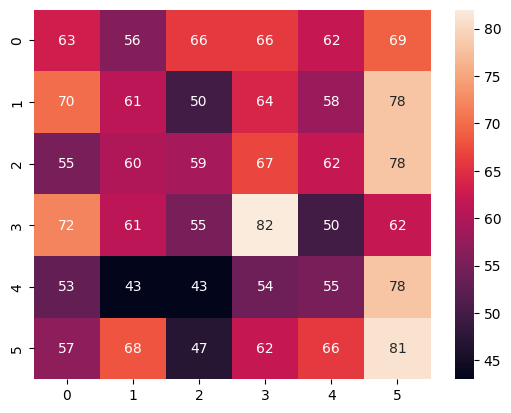

In [138]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix_df, annot=True)

### Third printing the classification report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report 

In [139]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       382
           1       0.58      0.54      0.56       381
           2       0.52      0.44      0.47       381
           3       0.58      0.60      0.59       382
           4       0.60      0.65      0.62       326
           5       0.57      0.67      0.62       381

    accuracy                           0.60      2233
   macro avg       0.60      0.60      0.60      2233
weighted avg       0.60      0.60      0.60      2233

